In [2]:
import pandas as pd

# Load the dataset
file_name = "all_cities_df (cleaned).csv"
df = pd.read_csv(file_name)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31734 entries, 0 to 31733
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    31734 non-null  object 
 1   Lat     31734 non-null  float64
 2   Lon     31734 non-null  float64
 3   Rank    31734 non-null  int64  
 4   Year    31734 non-null  int64  
 5   AQI     31734 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.5+ MB


(None,
                City        Lat        Lon  Rank  Year    AQI
 0      Delhi, India  28.627393  77.171695     3  2017  108.2
 1  Lahore, Pakistan  31.565682  74.314183     5  2017  133.2
 2      Hotan, China  37.114483  79.920016    13  2017   91.9
 3   Gurugram, India  28.464615  77.029919    17  2017  145.6
 4      Patna, India  25.609324  85.123525    20  2017  118.5)

In [12]:
# Checking for missing values
missing_values = df.isnull().sum()
print("missing_values\n")
print(missing_values,"\n")
# Checking for duplicates
duplicate_rows = df.duplicated().sum()
print("duplicate_rows\n")
print(duplicate_rows,"\n")
# Checking for outliers in AQI values using basic statistics
aqi_stats = df["AQI"].describe()
print("aqi_stats\n")
print(aqi_stats,"\n")
# Identifying cities with potential inconsistencies (e.g., AQI < 0 or extremely high values)
invalid_aqi = df[(df["AQI"] < 0) | (df["AQI"] > 500)]
print("invalid_aqi\n")
print(invalid_aqi,"\n")


missing_values

City    0
Lat     0
Lon     0
Rank    0
Year    0
AQI     0
dtype: int64 

duplicate_rows

0 

aqi_stats

count    31734.000000
mean        14.068378
std         12.460750
min          0.200000
25%          7.600000
50%         10.000000
75%         14.800000
max        271.300000
Name: AQI, dtype: float64 

invalid_aqi

Empty DataFrame
Columns: [City, Lat, Lon, Rank, Year, AQI]
Index: [] 



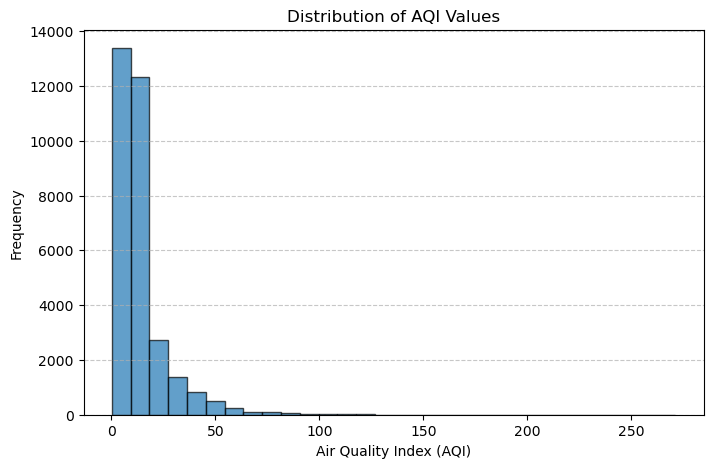

In [16]:
import matplotlib.pyplot as plt

# AQI Distribution
plt.figure(figsize=(8, 5))
plt.hist(df["AQI"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Frequency")
plt.title("Distribution of AQI Values")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


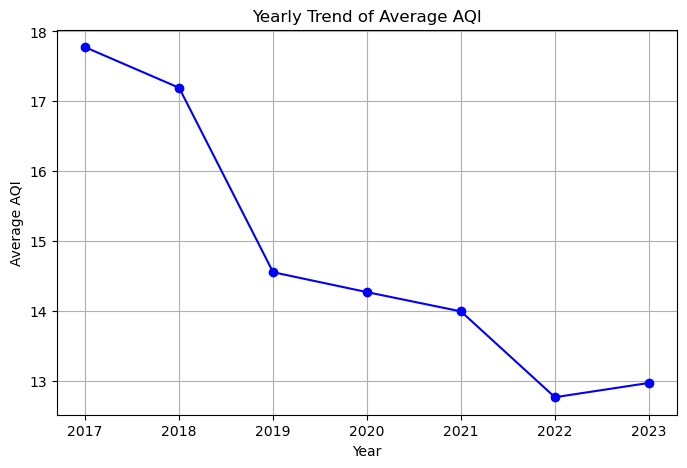

In [18]:

# Yearly Trend of AQI (Mean AQI per year)
yearly_aqi = df.groupby("Year")["AQI"].mean()
plt.figure(figsize=(8, 5))
plt.plot(yearly_aqi.index, yearly_aqi.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.title("Yearly Trend of Average AQI")
plt.grid(True)
plt.show()

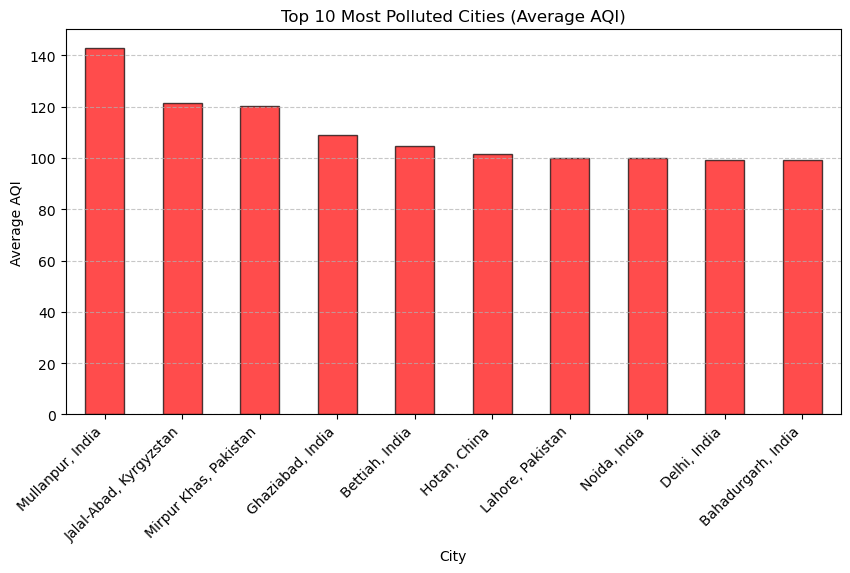

In [20]:
# Top 10 Polluted Cities
top_cities = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind="bar", color="r", edgecolor="black", alpha=0.7)
plt.xlabel("City")
plt.ylabel("Average AQI")
plt.title("Top 10 Most Polluted Cities (Average AQI)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()